# 장애인콜택시 대기시간 예측
## 단계2. 탐색적 데이터 분석

## 0.미션

* 1.개별 변수 분석하기
    * 앞서 생성된 각 변수들 특히 추가로 생성한 변수들에 대해서 단변량 분석을 수행합니다. 
    * 시각화 : Histogram, Boxplot, Barplot
    * 통계량 : 기초 통계량.
    * [옵션] 날짜 요소 관점을 추가해서 EDA 를 수행하시오.
* 2.Features와 Target의 관계 분석하기
    * Target은 숫자입니다.
    * 숫자형 feature들과 Target 과의 관계
        * 한꺼번에 상관관계를 확인하는 방법을 이용하여 분석합시다.
    * 범주형 feature들과 Target
        * sns.barplot, t-검정, 분산분석 등을 이용하여 분석합니다.
    * Target과 관련이 높은 feature와 그렇지 않은 feature를 정리해 봅시다.

## 1.환경설정

### (1) 라이브러리 불러오기

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.




### (2) 데이터 로딩
* 주어진 데이터셋
    * [1.전처리 단계]에서 저장한 파일 : data1pkl
* 다음의 두가지 방법 중 하나를 선택하시오.
    * 1) 로컬 수행(Ananconda)
    * 2) 구글콜랩

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/6_mini/3,4일차/'

#### 3) 데이터 읽어오기

In [4]:
file1 = 'data1.pkl'

In [51]:
data = joblib.load(path + file1)
data.head() 

,Date,vehicle_operation,reception_cases,boarding_cases,average_wait_time,average_fare,average_boarding_distance,target,temp_max_forecast,temp_min_forecast,rain(mm)_forecast,humidity_max(%)_forecast,humidity_min(%)_forecast,sunshine(MJ/m2)_forecast,month,Boarding rate,holiday,average_wait_time_7,day,holiday eve
0,2015-01-01,213,1023,924,23.2,2427,10764,17.2,-2.0,-8.9,0.0,63.0,28.0,9.07,1,0.903226,1,40.316706,Thursday,0.0
1,2015-01-02,420,3158,2839,17.2,2216,8611,26.2,2.4,-9.2,0.0,73.0,37.0,8.66,1,0.898987,0,40.316706,Friday,1.0
2,2015-01-03,209,1648,1514,26.2,2377,10198,24.5,8.2,0.2,0.0,89.0,58.0,5.32,1,0.918689,1,40.316706,Saturday,1.0
3,2015-01-04,196,1646,1526,24.5,2431,10955,26.2,7.9,-0.9,0.0,95.0,52.0,6.48,1,0.927096,1,40.316706,Sunday,0.0
4,2015-01-05,421,4250,3730,26.2,2214,8663,23.6,4.1,-7.4,3.4,98.0,29.0,10.47,1,0.877647,0,40.316706,Monday,0.0


## 2.EDA : 1단계 - 개별 정보 분석하기

* **세부요구사항**
    * 의미 있는 변수들을 7개 이상 선정하고 단변량분석을 수행합니다. 
    * [옵션] 각 변수에 대한 탐색시, 요일별, 월별, 연도별로 나눠서도 확인해보세요.
    * 단변량 분석을 위한 코드를 함수로 작성하고 수행하세요.

### (1) 단변량 분석 함수 작성
* **세부요구사항**
    * 코드가 반복되므로, 시각화와 기초통계량을 한꺼번에 처리하는 함수를 생성합시다.
    * 포함되어야 할 내용 : 
        * 기초통계량
            * 숫자 : .describe()
            * 범주 : 범주별 빈도수/비율
        * 시각화


In [20]:
!pip install ydata_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 94.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 90.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=359fa05892ac7102bb21b91bd45fcce51c302ae123d6a879a3d41b484666c293
  Stored in directory: /root/.cache/pip/wheels/1d/05/04/c6d7d3

In [52]:
from ydata_profiling import ProfileReport
profile = ProfileReport(data, title="Data Profiling Report")
profile.to_file(output_file = path + "output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

count    2922.000000
mean      418.700890
std       133.756369
min       132.000000
25%       278.000000
50%       454.000000
75%       522.000000
max      1413.000000
Name: vehicle_operation, dtype: float64


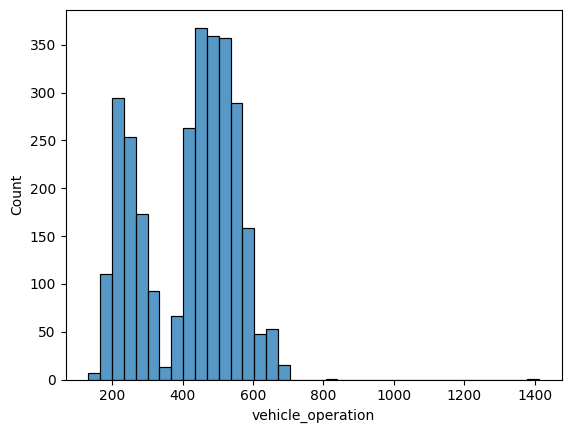

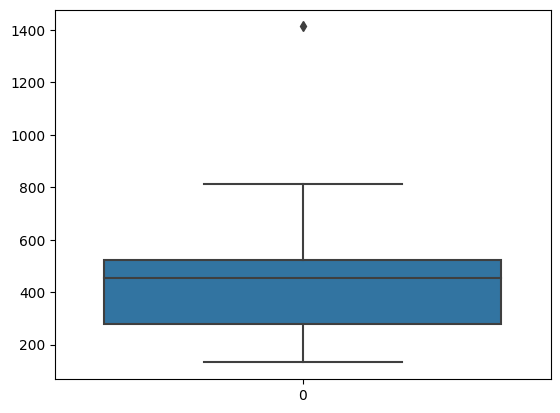

In [53]:
# 숫자형 변수 분석
print(data["vehicle_operation"].describe())
sns.histplot(data["vehicle_operation"])
plt.show()
sns.boxplot(data["vehicle_operation"])
plt.show()

count    2922.000000
mean     3925.439767
std      1509.964823
min       527.000000
25%      2160.500000
50%      4720.500000
75%      5110.000000
max      6182.000000
Name: reception_cases, dtype: float64


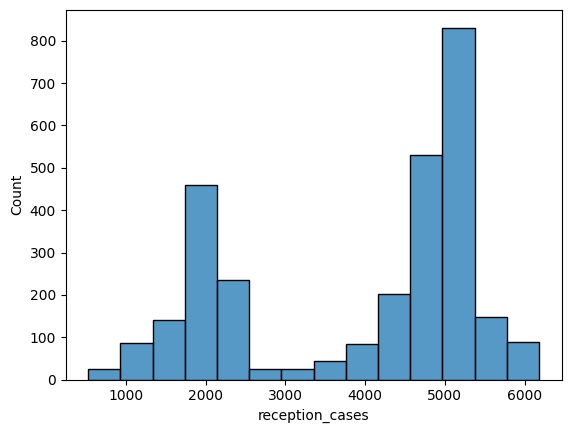

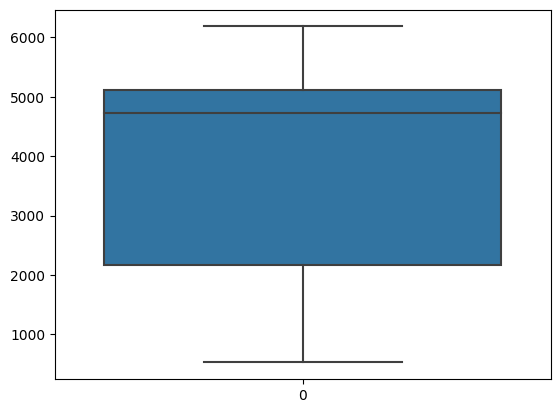

In [54]:
print(data["reception_cases"].describe())
sns.histplot(data["reception_cases"])
plt.show()
sns.boxplot(data["reception_cases"])
plt.show()

count    2922.000000
mean     2304.357632
std       107.369846
min      2131.000000
25%      2228.000000
50%      2257.000000
75%      2401.000000
max      2733.000000
Name: average_fare, dtype: float64


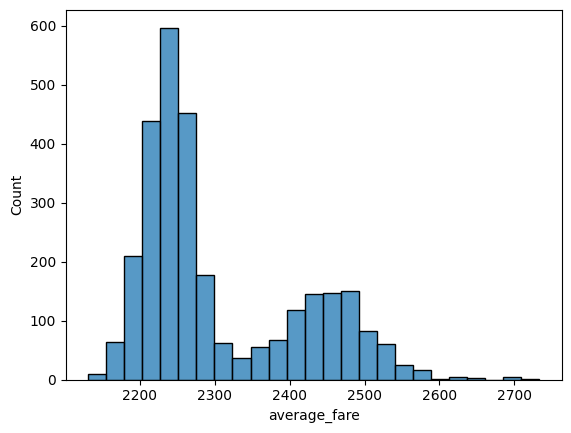

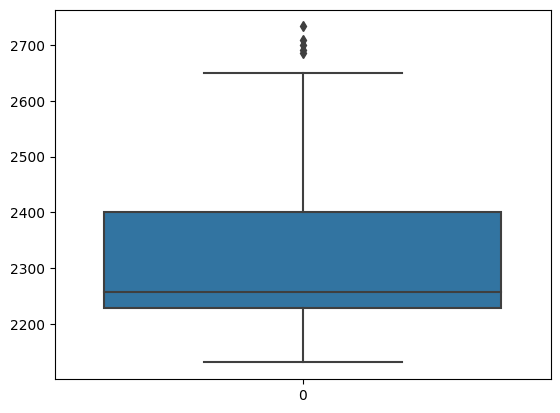

In [55]:
print(data["average_fare"].describe())
sns.histplot(data["average_fare"])
plt.show()
sns.boxplot(data["average_fare"])
plt.show()

count     2922.000000
mean      9254.291239
std       1020.236019
min       7672.000000
25%       8521.000000
50%       8821.500000
75%      10154.000000
max      14136.000000
Name: average_boarding_distance, dtype: float64


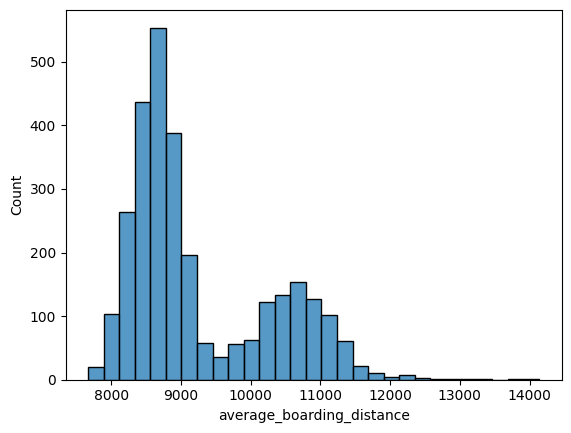

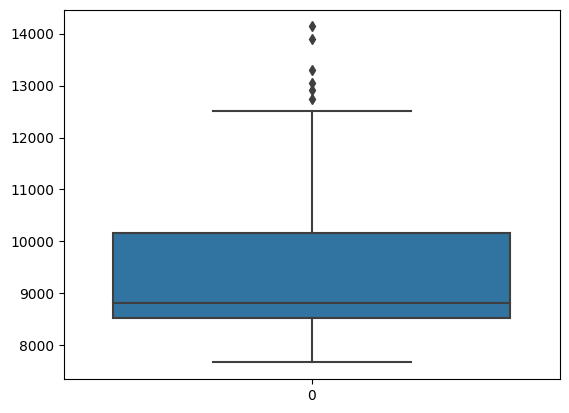

In [56]:
print(data["average_boarding_distance"].describe())
sns.histplot(data["average_boarding_distance"])
plt.show()
sns.boxplot(data["average_boarding_distance"])
plt.show()

count    2922.000000
mean        3.355613
std        12.595804
min         0.000000
25%         0.000000
50%         0.000000
75%         0.300000
max       178.900000
Name: rain(mm)_forecast, dtype: float64


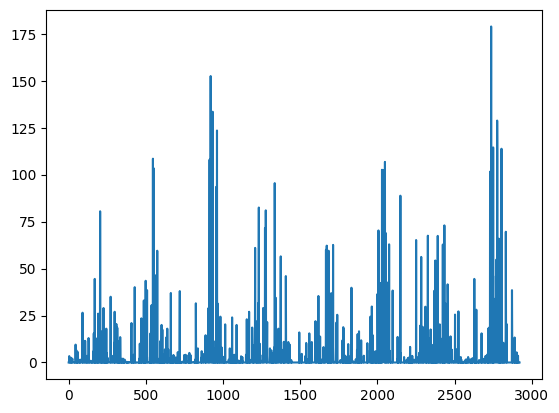

In [57]:
# rain(mm)_forecast
print(data["rain(mm)_forecast"].describe())
plt.plot(data["rain(mm)_forecast"])
# sns.histplot(data["rain(mm)_forecast"])
plt.show()	

In [ ]:
# 범주형 변수 분석


### (2) 숫자형 변수
* 이제 숫자형 변수들에 대해서 단변량 분석을 수행합니다.

### (3) 범주형 변수
* 범주형 변수들에 대해서 단변량 분석을 수행합니다.

In [58]:
data["month"].value_counts()

10    249
1     248
3     248
5     248
7     248
8     248
12    247
4     240
6     240
9     240
11    240
2     226
Name: month, dtype: int64

In [59]:
data["day"].value_counts()

Friday       418
Thursday     418
Tuesday      418
Monday       417
Saturday     417
Sunday       417
Wednesday    417
Name: day, dtype: int64

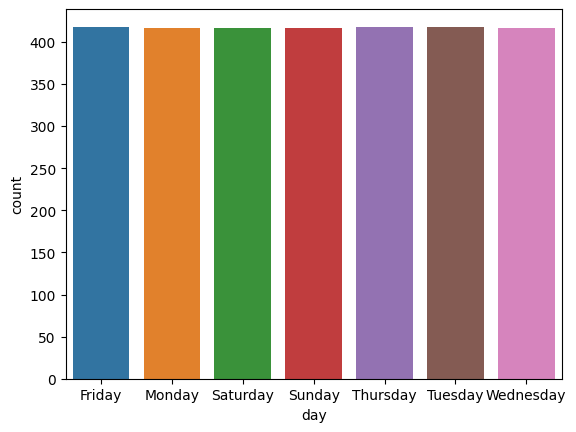

In [60]:
sns.countplot(data=data,x="day")
plt.show()

In [61]:
data["holiday"].value_counts()

0    2005
1     917
Name: holiday, dtype: int64

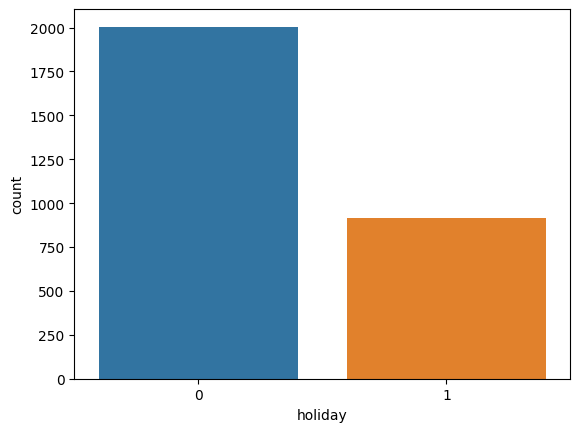

In [62]:
sns.countplot(data=data,x="holiday")
plt.show()

In [63]:
data["holiday eve"].value_counts(normalize=True)

0.0    0.686174
1.0    0.313826
Name: holiday eve, dtype: float64

## 3.EDA 2단계 - feature와 target 비교 분석하기

* **세부요구사항**
    * 숫자 feature --> target
        * 전체 상관계수 구하고 시각화(heatmap)해서 파악해봅시다.
        * 상위 n개의 feature와 target의 상점도를 확인해봅시다.
    * 범주 feature --> target
        * 시각화 : 평균 비교 barplot
        * 수치화 : t-test, anova
    * 이번 단계에서는 함수 생성은 선택사항 입니다.

### (1) 숫자 feature --> Target
* 전체 상관계수 시각화(heatmap)
* 상위 n개 산점도 그리기

#### 1) 전체 상관계수 시각화

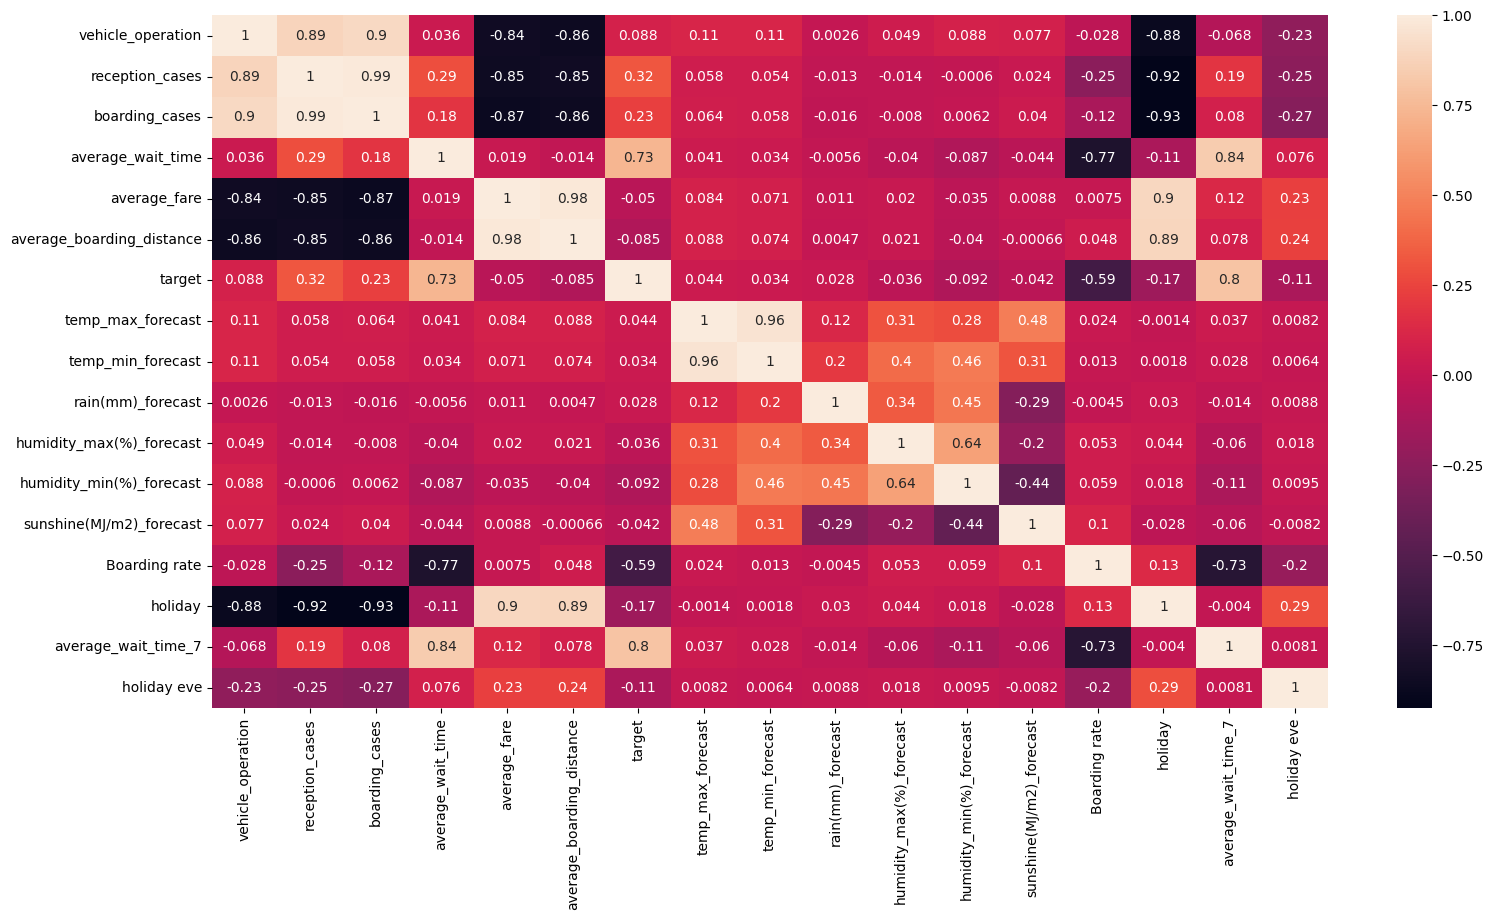

In [64]:
a=data.corr(numeric_only=True)
plt.figure(figsize=(18,9))
sns.heatmap(a,annot=True)
plt.show()

#### 2) 산점도

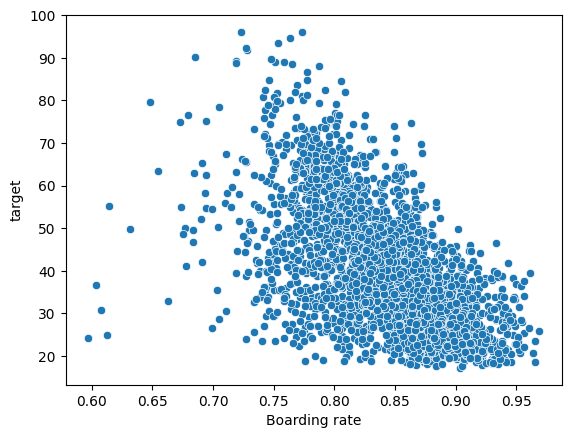

In [79]:
sns.scatterplot(x=data["Boarding rate"],y=data["target"])
plt.show()

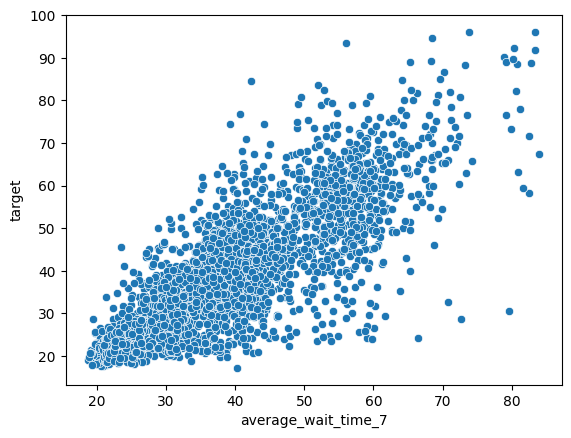

In [65]:
sns.scatterplot(x=data["average_wait_time_7"],y=data["target"])
plt.show()

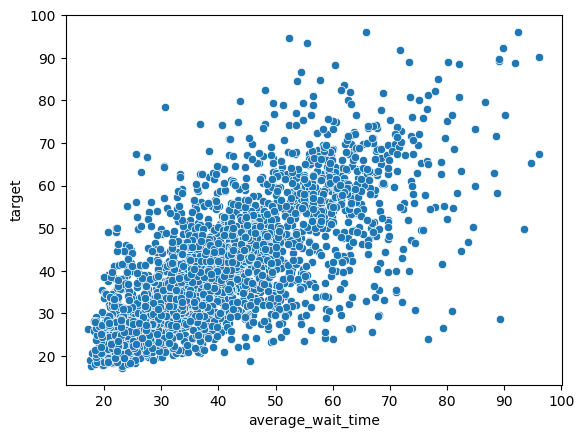

In [66]:
sns.scatterplot(x=data["average_wait_time"],y=data["target"])
plt.show()

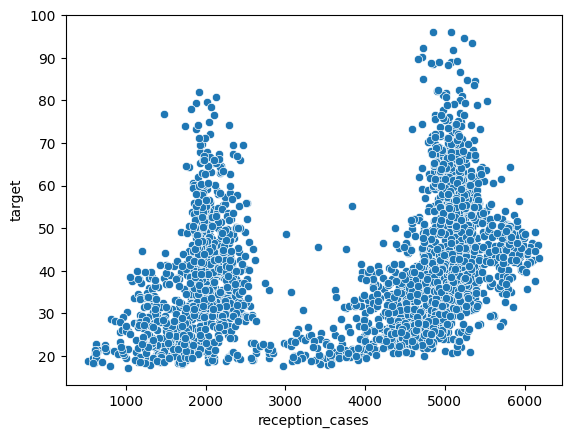

In [67]:
sns.scatterplot(x=data["reception_cases"],y=data["target"])
plt.show()

### (2) 범주 feature --> Target

* 범주형 변수들과 target 간의 관계를 살펴봅시다.
    * 시각화 : 평균비교 barplot
    * 수치화 : t-검정, anova

In [68]:
import scipy.stats as spst
spst.ttest_ind(data['holiday'],data['target'])

Ttest_indResult(statistic=-153.25842983108635, pvalue=0.0)

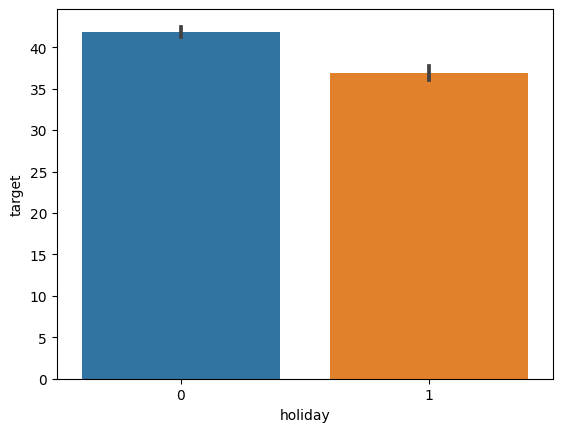

In [70]:
sns.barplot(data=data,x="holiday",y='target')
plt.show()

In [69]:
spst.ttest_ind(data['holiday eve'],data['target'])

Ttest_indResult(statistic=-153.25842983108635, pvalue=0.0)

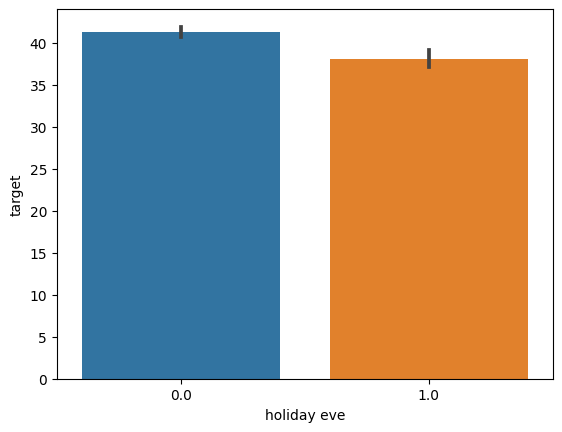

In [71]:
sns.barplot(data=data,x="holiday eve",y='target')
plt.show()

In [72]:
data["day"].unique()

['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday']
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
                         'Wednesday']

In [73]:
P_1 = data.loc[data.day == "Monday", 'target']
P_2 = data.loc[data.day == "Tuesday", 'target']
P_3 = data.loc[data.day == "Wednesday", 'target']
P_4 = data.loc[data.day == "Thursday", 'target']
P_5 = data.loc[data.day == "Friday", 'target']
P_6 = data.loc[data.day == "Saturday", 'target']
P_7 = data.loc[data.day == "Sunday", 'target']
spst.f_oneway(P_1, P_2, P_3,P_4,P_5,P_6,P_7)

F_onewayResult(statistic=15.668738200566109, pvalue=8.766163819661817e-18)

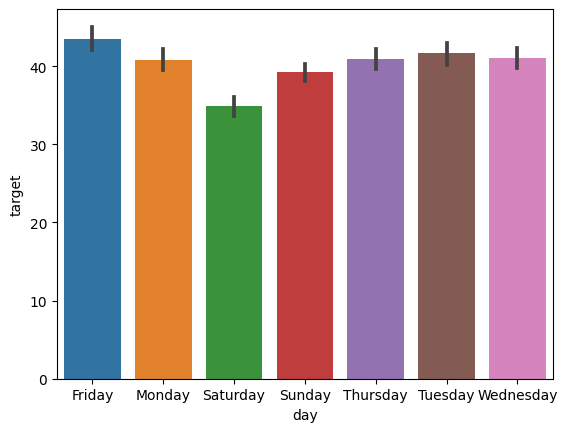

In [77]:
sns.barplot(data=data,x="day",y="target")
plt.show()

In [74]:
data["month"].unique()

[1, 2, 3, 4, 5, ..., 8, 9, 10, 11, 12]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]

In [75]:
P_1 = data.loc[data.month == 1, 'target']
P_2 = data.loc[data.month == 2, 'target']
P_3 = data.loc[data.month == 3, 'target']
P_4 = data.loc[data.month == 4, 'target']
P_5 = data.loc[data.month == 5, 'target']
P_6 = data.loc[data.month == 6, 'target']
P_7 = data.loc[data.month == 7, 'target']
P_8 = data.loc[data.month == 8, 'target']
P_9 = data.loc[data.month == 9, 'target']
P_10 = data.loc[data.month == 10, 'target']
P_11 = data.loc[data.month == 11, 'target']
P_12 = data.loc[data.month == 12, 'target']

spst.f_oneway(P_1, P_2, P_3,P_4,P_5,P_6,P_7,P_8,P_9,P_10,P_11,P_12)

F_onewayResult(statistic=25.956649418729295, pvalue=4.6472836366607295e-52)

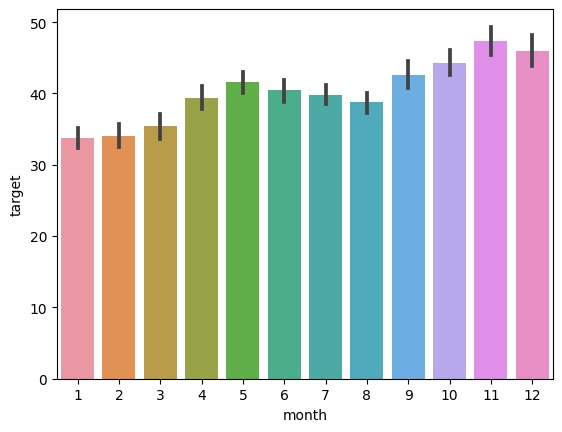

In [78]:
sns.barplot(data=data,x="month",y="target")
plt.show()

## 4.변수 정리

* Target과 관련성이 높은 feature와 그렇지 않은 feature를 정리합니다.
* 여기서의 판단은 다소 주관적입니다. 조금 정확하지 않아도 괜찮습니다.
* 다음 단계 모델링에서 관련이 적은 변수는 포함시키거나, 제외를 고려할때 활용합니다.

* 강한 관계의 변수

* 중간(약한) 관계의 변수

* (거의) 관계가 없는 변수

## 5.데이터 저장

* **세부 요구사항**
    * 혹시 데이터에 변경이 발생할 수 있으니, 저장해 놓읍시다.
    * joblib.dump를 이용하시오.
    * 저장할 파일 이름 : data2.pkl

In [80]:
joblib.dump(data, path + "data2.pkl")

['/content/drive/MyDrive/6_mini/3,4일차/data2.pkl']